# Feature Engineering

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\mercedes_benz.csv')
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Further analysis i just pick 7 columns

In [3]:
sample=df[['y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
df=df[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [4]:
df.shape

(4209, 7)

In [5]:
df.size

29463

In [6]:
df.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [7]:
df.dtypes

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X0      4209 non-null   object
 1   X1      4209 non-null   object
 2   X2      4209 non-null   object
 3   X3      4209 non-null   object
 4   X4      4209 non-null   object
 5   X5      4209 non-null   object
 6   X6      4209 non-null   object
dtypes: object(7)
memory usage: 230.3+ KB


### Lets Check how many unique values each columns has

In [9]:
data=df

In [10]:
for col in data.columns:
    print("{} has {} unique values".format(col, data[col].nunique()))

X0 has 47 unique values
X1 has 27 unique values
X2 has 44 unique values
X3 has 7 unique values
X4 has 4 unique values
X5 has 29 unique values
X6 has 12 unique values


### Perform simple one hot encoding because columns contains categorical data

In [11]:
data1=pd.get_dummies(data, drop_first=True)
data1.head()

,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


**We have 6 columns from these columns 163 columns are created using simple one hot encoding(dummies).**

**To get rid of above problem use 10 most frequent labels convert them into dummy variables using onehotencoding.**

In [12]:
df1=df

In [13]:
for col in df1.columns:
    top_10_labels=[y for y in df1[col].value_counts().sort_values(ascending=False).head(10).index]
    print("Column name: {}".format(col),top_10_labels)
    for label in top_10_labels:
        df1[col+'_'+label] = np.where(df1[col]==label, 1, 0)

df1.head()

Column name: X0 ['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']
Column name: X1 ['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']
Column name: X2 ['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']
Column name: X3 ['c', 'f', 'a', 'd', 'g', 'e', 'b']
Column name: X4 ['d', 'a', 'b', 'c']
Column name: X5 ['w', 'v', 'q', 'r', 's', 'd', 'n', 'p', 'm', 'i']
Column name: X6 ['g', 'j', 'd', 'i', 'l', 'a', 'h', 'k', 'c', 'b']


,X0,X1,X2,X3,X4,X5,X6,X0_z,X0_ak,X0_y,...,X6_g,X6_j,X6_d,X6_i,X6_l,X6_a,X6_h,X6_k,X6_c,X6_b
0,k,v,at,a,d,u,j,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,0,0,1,0,0,0,0,0,0,0


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Categorical Encoding

### Types Encoding:
1. One-hot Encoding
2. Dummy Encoding
3. Label or Ordinal Encoding
4. Target encoding
5. Binary encoding
6. Frequency / count encoding
7. Feature Hashing

So, which one should you use?

- It depends on the dataset, the model, and the performance metric you are trying to optimize.
- In general, one-hot encoding is the most commonly used method for nominal variables. It is simple to understand and implement, and it works well with most machine learning models. To fight the curse of dimensionality, binary encoding might be a good alternative to one-hot encoding because it creates fewer columns when encoding categorical variables.
- Ordinal encoding is a good choice if the order of the categorical variables matters. For example, if we were predicting the price of a house, the label “small”, “medium”, and “large” would imply that a small house is cheaper than a medium house, which is cheaper than a large house. The label is easily reversible and doesn’t increase the dimensionality of the data.
- On the other hand, the target encoding is a supervised encoder that captures information about the label and potentially predictive features. This encoder does not increase the dimensionality of the feature space, but can lead to overfitting and is prone to target leakage.
- The frequency and count encoders are also supervised methods that do not increase the dimensionality of the feature space. However, these methods can only be used if the count refers to the target variable, otherwise, all categories that have similar cardinality will be counted the same.
- The feature hashing is a good way to handle categorical variables when the cardinality is very high as it is fast to compute and does not grow in size when adding categories.

### Two Type of categorical data
1. Ordinal Data:
    * The categories have an inherent order.
    * In Ordinal data, while encoding, one should retain the information regarding the order in which the category is provided.
    * For example, the height of person(tall, average, small).


2. Nominal Data:
    * The categories do not have an inherent order.
    * While encoding Nominal data, we have to consider the presence or absence of a feature. In such a case, no notion of order is present.
    * For example, the city a person lives in.

### Important Terms
**Unsupervised encoding methods** don’t make use of the target variable to encode categorical variables (e.g. encode player names with a formula that takes the number of points that they made).

**Supervised encoding methods** employ the target variable to encode categorical variables.

**Cardinality** of a categorical variable stands for the number of categories represented by this variable.

**Target leakage** occurs when a variable is used for training but would not be available at inference time.

### 1. One-Hot Encoding
- In one-hot encoding, categorical data are represented as vectors of zeros and ones.
- This is done by using a separate dummy variable for each category, and setting the value of the dummy variable to 1 if the observation belongs to that category and 0 otherwise.

In [14]:
sample1=sample.copy()
sample1.head()

,y,X0,X1,X2,X3,X4,X5,X6
0,130.81,k,v,at,a,d,u,j
1,88.53,k,t,av,e,d,y,l
2,76.26,az,w,n,c,d,x,j
3,80.62,az,t,n,f,d,x,l
4,78.02,az,v,n,f,d,h,d


In [15]:
for col in sample1.columns:
    print("{} has {} unique values".format(col, sample1[col].nunique()))

y has 2545 unique values
X0 has 47 unique values
X1 has 27 unique values
X2 has 44 unique values
X3 has 7 unique values
X4 has 4 unique values
X5 has 29 unique values
X6 has 12 unique values


#### We go for OneHotEncoding when the categorical features are less., Use X3 column for OneHotEncoding

In [16]:
from sklearn.preprocessing import OneHotEncoder
encode=OneHotEncoder()
ohe=encode.fit_transform(sample1[['X3']])
print(encode.categories_)
print(ohe.toarray())

[array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object)]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


### 2. Dummy Encoding
Dummy Encoding is similar to one-hot encoding, categorical data are represented as vectors of zeros and ones.
This is done by using a separate dummy variable for each category, and setting the value of the dummy variable to 1 if the observation belongs to that category and 0 otherwise.

#### We go for OneHotEncoding when the categorical features are less., Use X3 column for OneHotEncoding

In [17]:
sample2=sample.copy()

In [18]:
pd.get_dummies(sample2['X3'])

,a,b,c,d,e,f,g
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
4204,0,0,1,0,0,0,0
4205,0,0,0,1,0,0,0
4206,1,0,0,0,0,0,0
4207,0,0,0,0,0,1,0


**There are 7 labels in X3 columns so 7 dummies are created.**

### 3. Label or Ordinal Encoding
- We use this categorical data encoding technique when the categorical feature is ordinal.
- In this case, retaining the order is important. Hence encoding should reflect the sequence.
- In Label encoding, each label is converted into an integer value.

In [19]:
sample3=sample.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
le=encode.fit_transform(sample['X3'])
print(encode.classes_)
print(le)

['a' 'b' 'c' 'd' 'e' 'f' 'g']
[0 4 2 ... 0 5 2]


#### Ordinal Encoder

In [33]:
sample4=sample.copy()

In [34]:
from sklearn.preprocessing import OrdinalEncoder
encode=OrdinalEncoder()
orden=encode.fit_transform(sample4[['X3']])
print(encode.categories_)
print(orden.reshape(-1,1))

[array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object)]
[[0.]
 [4.]
 [2.]
 ...
 [0.]
 [5.]
 [2.]]


### 4. Target Encoding
- Target encoding is a technique for encoding the categorical values of the features by using the target value. The idea behind this technique is that if the feature is a good predictor of the target, then its values should be closer to the target.

**Bayesian encoders use information from dependent/target variables to encode the categorical data.**

#### a. Target-mean encoding: 
    - We replace the category with the mean of the target values. This method will usually be used with smoothing to avoid target leakage.
    
#### b. Leave-one-out encoding:
    - This method is very similar to target mean encoding, but the difference is that in leave-one-out encoding, we take the mean of the target values of all the samples except the one we want to predict.

#### a. Target-mean encoding:

In [42]:
sample5=sample.copy()

In [52]:
from category_encoders import TargetEncoder
encode=TargetEncoder(smoothing=1.0)
en=encode.fit_transform(sample5['X3'], sample5['y'])
en

,X3
0,102.507477
1,100.033190
2,101.959269
3,96.564507
4,96.564507
...,...
4204,101.959269
4205,105.114414
4206,102.507477
4207,96.564507


#### b. OneLeaveOut Encoding

In [47]:
sample6=sample.copy()

In [50]:
from category_encoders import LeaveOneOutEncoder
encode=LeaveOneOutEncoder()
en=encode.fit_transform(sample5['X3'], sample5['y'])
en

,X3
0,102.443007
1,100.104198
2,101.972509
3,96.579340
4,96.581758
...,...
4204,101.956471
4205,105.101765
4206,102.492187
4207,96.572958


### 5. Binary Encoding
- Binary encoding is a technique used to transform categorical data into numerical data by encoding categories as integers and then converting them into binary code.

In [59]:
sample6=sample.copy()

In [70]:
from category_encoders import BinaryEncoder
encode=BinaryEncoder()
en=encode.fit_transform(sample6['X4'])
en

,X4_0,X4_1,X4_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
4204,0,0,1
4205,0,0,1
4206,0,0,1
4207,0,0,1


### 6. Frequency / count encoding
- Count encoding is a way of representing categorical data using the count of the categories. Frequency encoding is simply a normalized version of count encoding.

In [72]:
sample7=sample.copy()

In [81]:
sample7['X3'].value_counts()

c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

In [80]:
from category_encoders import CountEncoder
encode=CountEncoder()
en=encode.fit_transform(sample7['X3'])
en

,X3
0,440
1,163
2,1942
3,1076
4,1076
...,...
4204,1942
4205,290
4206,440
4207,1076


In [79]:
#frequency encoding- Normalize version of count encoding
from category_encoders import CountEncoder
encode=CountEncoder(normalize=True)
en=encode.fit_transform(sample7['X3'])
en

,X3
0,0.104538
1,0.038727
2,0.461392
3,0.255643
4,0.255643
...,...
4204,0.461392
4205,0.068900
4206,0.104538
4207,0.255643


### 7. Feature Hashing
- Feature hashing is a way of representing data in a high-dimensional space using a fixed-size array. This is done by encoding categorical variables with the help of a hash function.

In [87]:
sample8=pd.DataFrame({"player":['riya','siya','diya','piya','miya','jiya'],
                    "score":[89,87,56,76,82,90]})
sample8

,player,score
0,riya,89
1,siya,87
2,diya,56
3,piya,76
4,miya,82
5,jiya,90


In [88]:
from category_encoders import HashingEncoder
encode=HashingEncoder()
en=encode.fit_transform(sample8['player'])
en

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Handling Missing value

### Ways to handle Numeric missing values
1. Drop rows or columns that have a missing value
2. Drop rows or columns that only have missing values
3. Drop rows or columns based on a threshold value
4. Drop based on a particular subset of columns
5. Fill with a constant value
6. Fill with an aggregated value
7. Replace with the previous or next value
8. Fill by using another data frame

In [12]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\titanic_2.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [7]:
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

**Age has 174 missing rows, Fare has 1, Cabin has 659, Embarked has 1, Boat has 542, Body has 777, Home,dest has 386 Missing values.**

**To See Missing Values row,**

In [22]:
df[df['embarked'].isna()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


### 1. Drop rows or columns that have a missing value

In [13]:
#drop some unwanted columns that have many missing values
df1=df.copy()

df1.drop(['boat', 'body', 'home.dest'],axis=1, inplace=True)

In [21]:
#drop rows which have missing values
df2=df.copy()

df2.dropna(inplace=True)
df2.fare.isna().sum()

0

### 2. Drop rows or columns that only have missing values

In [29]:
df3=df.copy()
print('Shape before dropping missing value', df3.shape)
df3.dropna(how='all', axis=0, inplace=True)
print('Shape after droping row which have all missing values', df3.shape)
df3.dropna(how='any', axis=0, inplace=True)
print('Shape after droping row which have atleast missing values', df3.shape)

print("*************************************************************************")

df4=df.copy()
print('Shape before dropping missing value', df4.shape)
df4.dropna(how='all', axis=1, inplace=True)
print('Shape after droping column which have all missing values', df4.shape)
df4.dropna(how='any', axis=1, inplace=True)
print('Shape after droping column which have atleast missing values', df4.shape)

Shape before dropping missing value (850, 15)
Shape after droping row which have all missing values (850, 15)
Shape after droping row which have atleast missing values (0, 15)
*************************************************************************
Shape before dropping missing value (850, 15)
Shape after droping column which have all missing values (850, 15)
Shape after droping column which have atleast missing values (850, 8)


### 3. Drop rows or columns based on a threshold value

In [43]:
df5=df.copy()
print('Shape before dropping missing value', df5.shape)
df5.dropna(thresh=12, axis=0, inplace=True)
print('Shape after droping row which dont have 12 non missing rows', df5.shape)

print("*************************************************************************")

df6=df.copy()
print('Shape before dropping missing value', df6.shape)
df6.dropna(thresh=12, axis=1, inplace=True)
print('Shape after droping column which dont have 12 missing values', df6.shape)


Shape before dropping missing value (850, 15)
Shape after droping row which dont have 12 non missing rows (555, 15)
*************************************************************************
Shape before dropping missing value (850, 15)
Shape after droping column which dont have 12 missing values (850, 15)


### 4. Drop based on a particular subset of columns
We can take only some of the columns into consideration when dropping columns.

In [48]:
df7=df.copy()
print('Shape before droping', df7.shape)
df7.dropna(subset=['age','fare','embarked'], inplace=True)
print('Shape after droping', df7.shape)

Shape before droping (850, 15)
Shape after droping (674, 15)


#### Dropping is not the only option. In some cases, we may choose to fill missing values instead of dropping them. In fact, the filling might be a better option since data means value. How to fill the missing values, of course, depend on the structure of data and the task. The fillna function is used for filling the missing values.

### 5. Fill with a constant value

In [54]:
df8=df.copy()

print("Missing value :", df8.age.isna().sum())
#fill missing rows of age with constant value
df8.age.fillna(20, inplace=True)
print("After filling with constant value :", df8.age.isna().sum())

Missing value : 174
After filling with constant value : 0


### 6. Fill with an aggregated value
Another option is to use an aggregated value such as mean, median, or mode.

In [64]:
df9=df.copy()
print("Missing value :", df9.age.isna().sum())
#fill missing rows of age with mean
df9.age.fillna(df9['age'].mean(), inplace=True)
print("After filling with mean:", df9.age.isna().sum())

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

df9=df.copy()
print("Missing value :", df9.age.isna().sum())
#fill missing rows of age with median
df9.age.fillna(df9['age'].median(), inplace=True)
print("After filling with median:", df9.age.isna().sum())

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

df9=df.copy()
print("Missing value :", df9.age.isna().sum())
#fill missing rows of age with mode
mode=df9['age'].mode()
print("Frequently occuring:", mode.values)
df9.age.fillna(18, inplace=True)
print("After filling with mode:", df9.age.isna().sum())

Missing value : 174
After filling with mean: 0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Missing value : 174
After filling with median: 0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Missing value : 174
Frequently occuring: [18.]
After filling with mode: 0


### 7. Replace with the previous or next value

In [55]:
df10=df.copy()
print("Missing value :", df10.age.isna().sum())
#fill missing rows of age with previous value
df10.age.backfill(inplace=True)
print("After filling with previous value :", df10.age.isna().sum())


df11=df.copy()
print("Missing value :", df11.age.isna().sum())
#fill missing rows of age with previous value
df11.age.ffill(inplace=True)
print("After filling with next value :", df11.age.isna().sum())

Missing value : 174
After filling with previous value : 0
Missing value : 174
After filling with next value : 1


### 8. Fill by using another data frame

df_11.fillna(df_12)

### Ways to handle categorical missing values
1. Delete the observations
2. Replace missing values with the most frequent value
3. Develop a model to predict missing values
4. Apply unsupervised Machine learning techniques

**We already discused 1, 2 while handling numerical missing values, lets focus on third and forth technique**

In [100]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [101]:
df.shape

(200, 5)

In [102]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [103]:
df['Genre'][100:130]=np.NAN

C:\Users\User\AppData\Local\Temp/ipykernel_17168/1133172128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'][100:130]=np.NAN


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   170 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### 30 missing values in Genre.

### 3. Develop a model to predict missing values

In [116]:
missing=df[df['Genre'].isna()]
x_test=missing.drop(['Genre','CustomerID'], axis=1)
x_test

,Age,Annual Income (k$),Spending Score (1-100)
100,23,62,41
101,49,62,48
102,67,62,59
103,26,62,55
104,49,62,56
105,21,62,42
106,66,63,50
107,54,63,46
108,68,63,43
109,66,63,48


In [113]:
not_missing=df[~df['Genre'].isna()]
x_train=not_missing.drop(['Genre','CustomerID'], axis=1)
x_train

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [114]:
y_train=not_missing['Genre']
y_train

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 170, dtype: object

In [118]:
#create random forest model and predict
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array(['Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male'], dtype=object)

In [125]:
# add these to dataset
missing.insert(0, 'Genre1', y_pred)
missing.drop('Genre', axis=1, inplace=True)
missing.rename({'Genre1':'Genre'}, axis=1, inplace=True)
missing

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Genre,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
100,Female,101,23,62,41
101,Male,102,49,62,48
102,Female,103,67,62,59
103,Male,104,26,62,55
104,Female,105,49,62,56
105,Female,106,21,62,42
106,Male,107,66,63,50
107,Female,108,54,63,46
108,Male,109,68,63,43
109,Male,110,66,63,48


In [126]:
# Concate missing and not_missing
data=pd.concat([missing,not_missing], ignore_index=True)
data

,Genre,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,Female,101,23,62,41
1,Male,102,49,62,48
2,Female,103,67,62,59
3,Male,104,26,62,55
4,Female,105,49,62,56
...,...,...,...,...,...
195,Female,196,35,120,79
196,Female,197,45,126,28
197,Male,198,32,126,74
198,Male,199,32,137,18


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Handling Outliers
- Outlier never affect Median, so if you impute missing value with median and then treate outliers then its worthy.
- If you want to impute missing value with mean then first treat the outliers and then go for missing value imputation.

### There are two ways we can Detect Outliers
1. By Boxplot
2. By Skewness

### Dealing with Outliers
1. **Deleting the values**: 
    - You can delete the outliers if you know that the outliers are wrong or if the reason the outlier was created is never going to happen in the future.

2. **Changing the values**:
    - We can also change the values in the cases when we know the reason for the outliers.

3. **Data transformation**:
    - Data transformation is useful when we are dealing with highly skewed data sets. By transforming the variables, we can eliminate the outliers for example taking the natural log of a value reduces the variation caused by the extreme values. This can also be done for data sets that do not have negative values.
    
4. **Using different analysis methods**:
    - You could also use different statistical tests that are not as much impacted by the presence of outliers – for example using median to compare data sets as opposed to mean or use of equivalent nonparametric tests etc.
    
5. **Valuing the outliers**:
    - In case there is a valid reason for the outlier to exist and it is a part of our natural process, we should investigate the cause of the outlier as it can provide valuable clues that can help you better understand your process performance.

In [39]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [5]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

**Here age column is Integer type with 177 rows having missing values. If you want to Impute the missing values in age column with mean then the "Mean" will have effect of Outliers.. Hence first it is obvious to treate outliers then then go for mean value imputation..**

###  Boxplot method of Outlier Detection

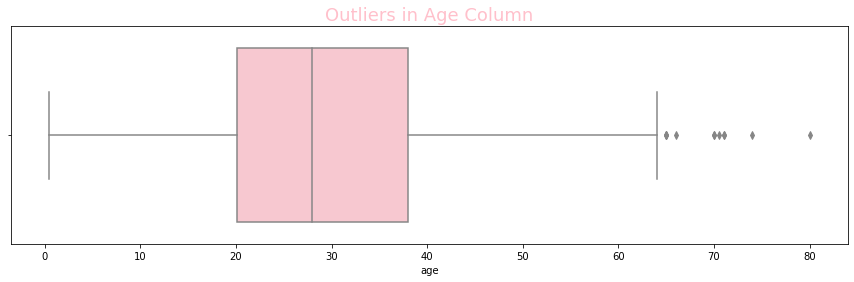

In [11]:
plt.figure(figsize=(15,4))
sns.boxplot(df['age'], color='pink')
plt.title('Outliers in Age Column', fontsize=18, color='pink');

**There are some values which lies out of the Upper extream.**

In [42]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
IQR=q3-q1
print("Q1:{} \nQ3:{} \nIQR:{}".format(q1,q3,IQR))

Q1:20.125 
Q3:38.0 
IQR:17.875


In [43]:
low_extr=q1 - 1.5*IQR
up_extr=q3 + 1.5*IQR
print("Lower Extreme: {} \nUpper Extreme: {}".format(low_extr,up_extr))

Lower Extreme: -6.6875 
Upper Extreme: 64.8125


**Replace outliers which are above Upper extreme in our case.**

#### Replace  ouliers with mean,median or quantile range

In [66]:
df['age']=np.where(df['age']>up_extr, 1, df['age'])

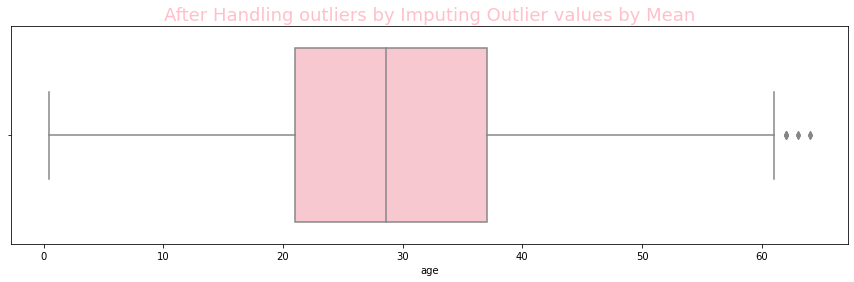

In [68]:
mean=df.age.mean()
df['age'].replace({1:mean}, inplace=True)
plt.figure(figsize=(15,4))
sns.boxplot(df['age'], color='pink')
plt.title('After Handling outliers by Imputing Outlier values by Mean', fontsize=18, color='pink');

### Skewness to detect Outliers

In [78]:
df=pd.read_excel('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\ML Datasets\\california_housing.xlsx')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


Skewness is :  0.9777632739098341


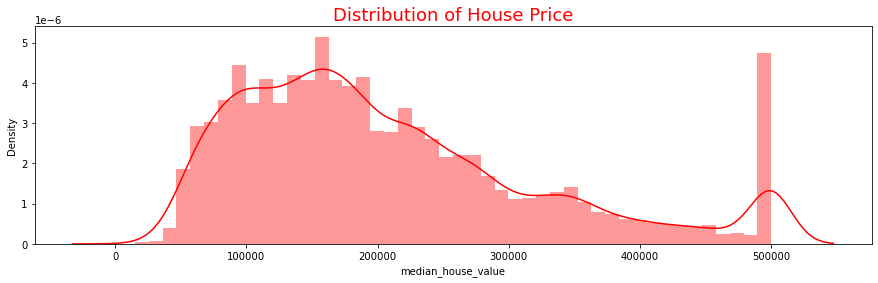

In [83]:
print("Skewness is : ", df['median_house_value'].skew())
plt.figure(figsize=(15,4))
sns.distplot(df['median_house_value'], color='red')
plt.title('Distribution of House Price', color='Red', fontsize=18);

**Skewness is 0.97 means Distribution is '[Moderately]' Skewed., From graph we can say that this is Right Skewed because tail is extended towards right.**

### Ways to handle Skewness
1. Log Tranformation
2. Square Root Tranformation
3. Cube Root Tranformation
4. BoxCox Tranformation

#### 1. Log Tranformation

Skewness Before Log Tranformation is :  0.9777632739098341
Skewness After Log Tranformation is :  -0.17317539032496318


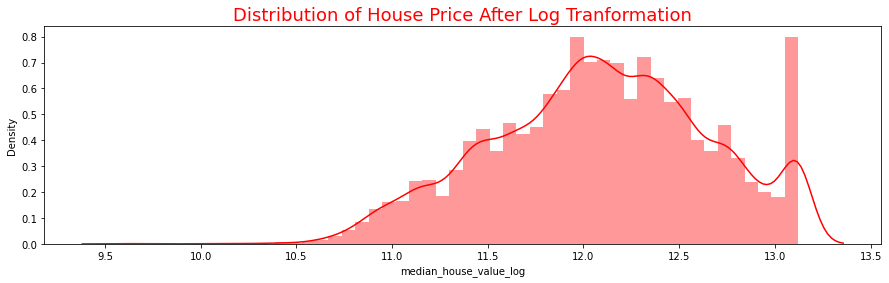

In [86]:
print("Skewness Before Log Tranformation is : ", df['median_house_value'].skew())
df['median_house_value_log']=np.log(df['median_house_value'])
print("Skewness After Log Tranformation is : ", df['median_house_value_log'].skew())
plt.figure(figsize=(15,4))
sns.distplot(df['median_house_value_log'], color='red')
plt.title('Distribution of House Price After Log Tranformation', color='Red', fontsize=18);

#### 2. SquareRoot Tranformation

Skewness Before Square Root Tranformation is :  0.9777632739098341
Skewness After Square Root Tranformation is :  0.43938209295248964


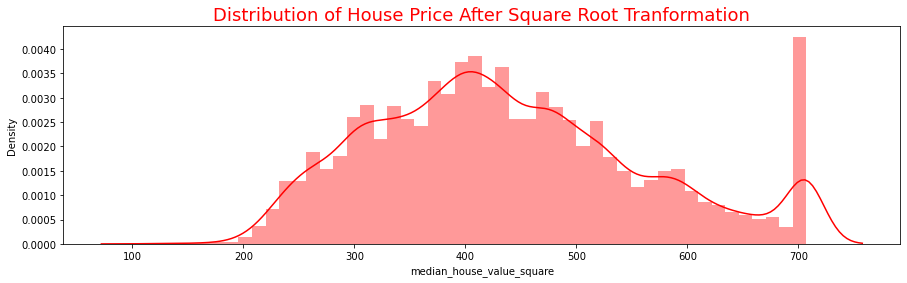

In [88]:
print("Skewness Before Square Root Tranformation is : ", df['median_house_value'].skew())
df['median_house_value_square']=np.sqrt(df['median_house_value'])
print("Skewness After Square Root Tranformation is : ", df['median_house_value_square'].skew())
plt.figure(figsize=(15,4))
sns.distplot(df['median_house_value_square'], color='red')
plt.title('Distribution of House Price After Square Root Tranformation', color='Red', fontsize=18);

#### 3. Cube root Transformation

Skewness Before Cube Root Tranformation is :  0.9777632739098341
Skewness After Cube Root Tranformation is :  0.2442591919835525


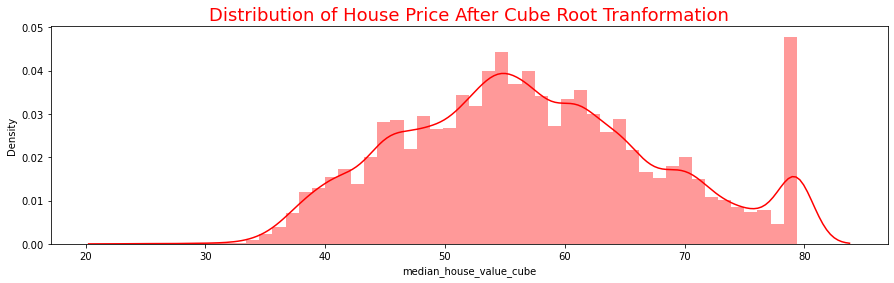

In [89]:
print("Skewness Before Cube Root Tranformation is : ", df['median_house_value'].skew())
df['median_house_value_cube']=np.cbrt(df['median_house_value'])
print("Skewness After Cube Root Tranformation is : ", df['median_house_value_cube'].skew())
plt.figure(figsize=(15,4))
sns.distplot(df['median_house_value_cube'], color='red')
plt.title('Distribution of House Price After Cube Root Tranformation', color='Red', fontsize=18);

#### 4. BoxCox Tranformation

Skewness Before BoxCox Tranformation is :  0.9777632739098341
Skewness After BoxCox Tranformation is :  -0.012149399033377138


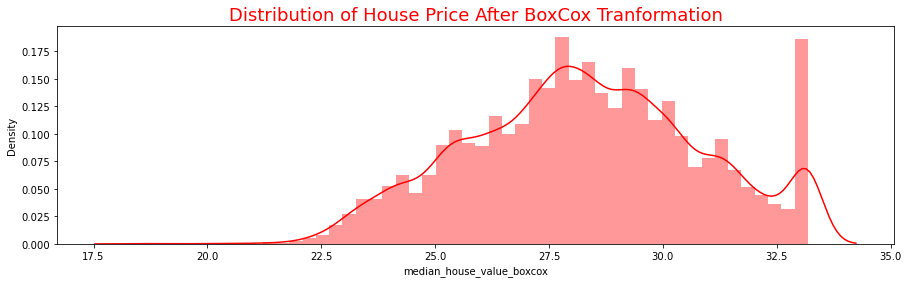

In [94]:
from scipy.stats import boxcox
print("Skewness Before BoxCox Tranformation is : ", df['median_house_value'].skew())
df['median_house_value_boxcox']=boxcox(df['median_house_value'])[0]
print("Skewness After BoxCox Tranformation is : ", df['median_house_value_boxcox'].skew())
plt.figure(figsize=(15,4))
sns.distplot(df['median_house_value_boxcox'], color='red')
plt.title('Distribution of House Price After BoxCox Tranformation', color='Red', fontsize=18);

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Binning
- Binning, or discretization, is grouping observations under ‘bins’. Converting ages of individuals to age groups or grouping countries according to their continent are examples of binning. The decision for binning depends on what you are trying to obtain from the data.

In [101]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


#### Create Bins for Age columns, 0-20,20-35,35-45,45-60,60-100

In [103]:
df['age_bin']=pd.cut(df['age'], bins=[0,20,45,60,100], labels=['0-20','20-45','45-60','60-100'])
df['age_bin'].value_counts()

20-45     432
0-20      179
45-60      81
60-100     22
Name: age_bin, dtype: int64

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Feature scaling
### Standardization or Normalization
- Feature scaling is standardizing the range of numerical features of the data. Consider these two examples:
    1. Suppose that you have a weight column with some values in kilograms and others in tons. Without scaling, an algorithm can consider 2000 kilograms to be greater than 10 tons.
    2. Suppose you have two columns for individuals in your dataset: age and height, with values ranging between 18-80 and 152-194, respectively. Without scaling, an algorithm doesn’t have a criteria to compare these values and is likely to weight larger values higher and weigh smaller values as lower, regardless of the unit of the values.
    
#### There are two common methods for scaling numerical data:

1. **Normalization** (or Min-Max Normalization): Vales are rescaled between 0 and 1.
2. **Standardization** (or Z-score Normalization): Values are rescaled so that it has a distribution with a 0 mean and variance equal to 1.

#### 1. Standardization
- When all features are having high values, not 0 and 1, then we use Standardization.
- It is a technique to standardize the independent features that present in a fixed range to bring all values to the same magnitudes.
- In standardization, the mean of the independent features is 0 and the standard deviation is 1.
- After encoding feature labels are in 0 and 1. This may affect standardization. To overcome this, we use Normalization.

**Standard Scaler used for Standardization,**
- Formula to calculate,
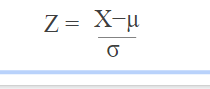

In [2]:
# Boston Dataset
from sklearn import datasets
boston = datasets.load_boston()
df= pd.DataFrame(boston.data)
df.columns=boston.feature_names
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Create dependent(y) and independent(X)
X=df.drop('MEDV', axis=1)
y=df['MEDV']

# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=0)

#### Standardize the Input features x_train,x_test

In [8]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
std_scaler_fit=scaler.fit(x_train)
x_train_std=std_scaler_fit.transform(x_train)
x_test_std=std_scaler_fit.transform(x_test)

In [15]:
pd.DataFrame(x_train_std, columns=x_train.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.372574,-0.499608,-0.704925,3.664502,-0.424879,0.935678,0.693669,-0.437218,-0.162242,-0.561656,-0.484638,0.371691,-0.411000
1,-0.397099,-0.499608,-0.044878,-0.272888,-1.241859,-0.491181,-1.835528,0.730055,-0.624648,-0.573376,0.336491,0.205012,-0.387681
2,-0.402693,0.771168,-0.886760,-0.272888,-1.111490,0.857849,-0.524621,1.234769,-0.393445,-0.602677,-0.849584,0.366609,-0.181919
3,-0.405769,0.029882,-0.465819,-0.272888,-0.277127,-0.417676,-0.086464,0.861527,-0.509046,-0.538216,-1.488240,0.415732,-0.037886
4,2.774932,-0.499608,0.998884,-0.272888,1.070021,-1.438097,0.715042,-1.021528,1.687378,1.542121,0.792674,-2.613393,1.911362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.381700,-0.499608,-0.535975,-0.272888,-0.546557,-0.855823,0.187829,0.457582,-0.509046,-0.678858,0.518964,0.365254,-0.132536
400,-0.405972,1.406555,-1.100094,-0.272888,-1.033268,1.262847,-1.522051,1.303922,-0.509046,-0.028387,-1.488240,0.358027,-1.349273
401,-0.398056,-0.499608,-0.159419,-0.272888,-0.077228,-0.404705,0.483496,-0.492223,-0.393445,0.170857,-0.302165,0.403423,-0.330067
402,-0.388424,-0.499608,-0.603269,-0.272888,-0.937664,-0.391733,0.586801,0.923558,-0.740249,-0.995304,-0.256546,0.383435,0.835915


In [16]:
pd.DataFrame(x_test_std, columns=x_test.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.408359,-0.499608,-1.128729,-0.272888,-0.833369,0.044972,-1.846215,0.695069,-0.624648,0.159137,-0.712729,0.185476,-0.736103
1,0.719251,-0.499608,0.998884,-0.272888,0.652840,-0.123657,1.103327,-1.251749,1.687378,1.542121,0.792674,0.083165,-0.435692
2,-0.402575,-0.499608,0.396108,3.664502,-0.051154,0.102623,0.832597,-0.195833,-0.509046,-0.743319,-0.940821,0.394727,-0.302632
3,2.634810,-0.499608,0.998884,-0.272888,1.191699,-1.373240,0.960837,-0.994916,1.687378,1.542121,0.792674,0.430412,0.968974
4,-0.409685,-0.499608,0.244340,-0.272888,-1.033268,-0.100597,-0.545994,0.598583,-0.509046,-0.028387,0.108400,0.311840,-0.050232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.414103,3.100922,-1.486672,-0.272888,-1.267933,0.117036,-1.187199,2.606998,-0.855850,-0.526496,-0.530256,0.430412,-0.951467
98,0.168069,-0.499608,0.998884,-0.272888,1.365525,0.321696,0.622424,-0.642174,1.687378,1.542121,0.792674,-3.476599,0.744008
99,-0.398260,0.559372,-0.858124,-0.272888,-0.894208,-0.808261,-0.100713,1.662728,-0.162242,-0.696439,0.564583,0.410198,0.060880
100,-0.399343,-0.499608,-0.076377,-0.272888,-0.581322,0.105505,-1.308316,0.084292,-0.624648,-0.737459,0.062782,0.305177,-0.456268


In [23]:
df.CHAS.nunique()

2

#### If you observe the CHAS column it is actually a Encoded features with labels, This is actually affect Standardization.. To overcome this we used Normalization

9

#### 2. Normalization
- Normalization also makes the training process less sensitive by the scale of the features. This results in getting better coefficients after training.
- After encoding feature labels are in 0 and 1. This may affect standardization. To overcome this, we use Normalization.

**There are two ways we can normalize the features,**


**A. MinMaxScaler**
- It is a method to rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
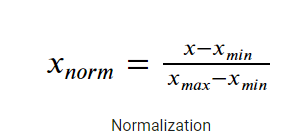

#### Loading inbuilt Boston dataset for these implementation

In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()
min_max_fit=min_max.fit(x_train)
x_train_min_max=min_max_fit.transform(x_train)
x_test_min_max=min_max_fit.transform(x_test)

In [22]:
pd.DataFrame(x_train_min_max, columns=x_train.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.003954,0.000,0.210411,1.0,0.251029,0.649550,0.881565,0.154077,0.304348,0.229008,0.510638,0.986888,0.226383
1,0.001713,0.000,0.379399,0.0,0.057613,0.459858,0.150360,0.375547,0.130435,0.225191,0.702128,0.949670,0.231206
2,0.001202,0.300,0.163856,0.0,0.088477,0.639203,0.529351,0.471307,0.217391,0.215649,0.425532,0.985753,0.273759
3,0.000921,0.125,0.271628,0.0,0.286008,0.469630,0.656025,0.400491,0.173913,0.236641,0.276596,0.996722,0.303546
4,0.291495,0.000,0.646628,0.0,0.604938,0.333972,0.887745,0.043215,1.000000,0.914122,0.808511,0.320339,0.706667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.003120,0.000,0.253666,0.0,0.222222,0.411381,0.735324,0.323850,0.173913,0.190840,0.744681,0.985451,0.283972
400,0.000903,0.450,0.109238,0.0,0.106996,0.693045,0.240989,0.484428,0.173913,0.402672,0.276596,0.983837,0.032340
401,0.001626,0.000,0.350073,0.0,0.333333,0.471355,0.820803,0.143641,0.217391,0.467557,0.553191,0.993973,0.243121
402,0.002506,0.000,0.236437,0.0,0.129630,0.473079,0.850669,0.412260,0.086957,0.087786,0.563830,0.989510,0.484255


#### Now see the CHAS column, It is similar to its original state and this is what we required.

#### We can perform only Normalization or we can perform first standardization and then Normalization

In [26]:
min_max_fit=min_max.fit(x_train_std)
x_train_std_min_max=min_max_fit.transform(x_train_std)
x_test_std_min_max=min_max_fit.transform(x_test_std)

In [27]:
pd.DataFrame(x_train_std_min_max, columns=x_train.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.003954,0.000,0.210411,1.0,0.251029,0.649550,0.881565,0.154077,0.304348,0.229008,0.510638,0.986888,0.226383
1,0.001713,0.000,0.379399,0.0,0.057613,0.459858,0.150360,0.375547,0.130435,0.225191,0.702128,0.949670,0.231206
2,0.001202,0.300,0.163856,0.0,0.088477,0.639203,0.529351,0.471307,0.217391,0.215649,0.425532,0.985753,0.273759
3,0.000921,0.125,0.271628,0.0,0.286008,0.469630,0.656025,0.400491,0.173913,0.236641,0.276596,0.996722,0.303546
4,0.291495,0.000,0.646628,0.0,0.604938,0.333972,0.887745,0.043215,1.000000,0.914122,0.808511,0.320339,0.706667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.003120,0.000,0.253666,0.0,0.222222,0.411381,0.735324,0.323850,0.173913,0.190840,0.744681,0.985451,0.283972
400,0.000903,0.450,0.109238,0.0,0.106996,0.693045,0.240989,0.484428,0.173913,0.402672,0.276596,0.983837,0.032340
401,0.001626,0.000,0.350073,0.0,0.333333,0.471355,0.820803,0.143641,0.217391,0.467557,0.553191,0.993973,0.243121
402,0.002506,0.000,0.236437,0.0,0.129630,0.473079,0.850669,0.412260,0.086957,0.087786,0.563830,0.989510,0.484255


**B. Mean Normalization**
- It is a method to rescales the feature to a hard and fast range of [-1,1] with mean=0.
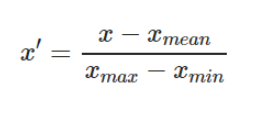

 ##### There is no Python method to implement this, we have to use formula manually to Mean Normalize

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Date Time Feature Engineering

In [12]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\unemployment.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [16]:
df.dtypes

Region                                       object
Date                                         object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

#### Date column is object type so change it to Datetime format

In [17]:
import datetime as dt

In [20]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Region                                              object
Date                                        datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                  int64
 Estimated Labour Participation Rate (%)           float64
Region.1                                            object
longitude                                          float64
latitude                                           float64
dtype: object

### Extracting Month from Date

In [21]:
df['Month']=df['Date'].dt.month
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


### Extracting Day from Date

In [22]:
df['Day']=df['Date'].dt.day
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month,Day
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,31
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,29
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,31
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,30
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,31


### Extracting Weekday from Date

In [23]:
df['weekday']=df['Date'].dt.weekday
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month,Day,weekday
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,31,4
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,29,5
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,31,1
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,30,3
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,31,6


### Extracting weekday name from Date

In [29]:
df['week']=df['Date'].dt.week
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month,Day,weekday,Quarter,weekday_name,week
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,31,4,1,4,5
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,29,5,1,5,9
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,31,1,1,1,14
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,30,3,2,3,18
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,31,6,2,6,22


### Extracting Quarter From Date

In [24]:
df['Quarter']=df['Date'].dt.quarter
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month,Day,weekday,Quarter
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,31,4,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,29,5,1
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,31,1,1
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,30,3,2
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,31,6,2


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Imbalance Datasets

In [43]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Here i am selecting Genre as my target variable

In [44]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

Here Female class is dominant over male.
After training the model using imbalanced data our model going learn more from dominant class and another class might be supresed.

### Techniques to Handle Imbalanced data

1. **Oversampling**- Increasing number of samples from lower class.
2. **Undersampling**- Decreasing number of samles from higher class.

**Oversaampling** is not possible in dataset, because we cannot increase the sample, But we can use undersampling to balance the Class.

In [45]:
female=df[df['Genre']=='Female']
male=df[df['Genre']=='Male']
print(female.shape[0], male.shape[0])

112 88


In [46]:
male.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13


In [47]:
female.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


Here We can reduce the samples from Higher class ie Female.

In [52]:
female_new=female[:88]
female_new.shape[0]

88

In [53]:
female_new.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


Now concate the two dataframe

In [56]:
data=pd.concat([female,male], axis=0, ignore_index=True)
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [57]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,3,Female,20,16,6
1,4,Female,23,16,77
2,5,Female,31,17,40
3,6,Female,22,17,76
4,7,Female,35,18,6


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Feature Selection

In [58]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\Data Sets\ML Datasets\\Mobile Price Classification.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### Price range is a target variable

#### There are many ways to Select features
1. Univarite Selection
2. Feature Importance
3. Correlation Matrix

#### 1. Univariate Selection

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [60]:
X=df.iloc[:,0:20]
y=df.iloc[:,-1]

In [66]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X,y)
dfscores=pd.DataFrame(fit.scores_, index=X.columns, columns=['Scores'])
dfscores

,Scores
battery_power,14129.866576
blue,0.723232
clock_speed,0.648366
dual_sim,0.631011
fc,10.135166
four_g,1.521572
int_memory,89.839124
m_dep,0.745820
mobile_wt,95.972863
n_cores,9.097556


In [67]:
pd.pivot_table(dfscores, index=dfscores.index, values='Scores',
               aggfunc=sum).sort_values(by='Scores', ascending=False)[:10]

,Scores
ram,931267.519053
px_height,17363.569536
battery_power,14129.866576
px_width,9810.586750
mobile_wt,95.972863
int_memory,89.839124
sc_w,16.480319
talk_time,13.236400
fc,10.135166
sc_h,9.614878


**We can select these 10 features to Train the model.**

#### 2. Feature Importance

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,y)
feat_importances=pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Scores'])
feat_importances

,Scores
battery_power,0.060202
blue,0.020419
clock_speed,0.033796
dual_sim,0.018968
fc,0.033107
four_g,0.018175
int_memory,0.035573
m_dep,0.034370
mobile_wt,0.035894
n_cores,0.033330


In [71]:
pd.pivot_table(feat_importances, index=feat_importances.index, values='Scores',
               aggfunc=sum).sort_values(by='Scores', ascending=False)[:10]

,Scores
ram,0.386674
battery_power,0.060202
px_height,0.047879
px_width,0.047532
mobile_wt,0.035894
talk_time,0.035872
int_memory,0.035573
sc_w,0.035021
pc,0.034902
m_dep,0.034370


#### 3. Correlation Matrix

<AxesSubplot:>

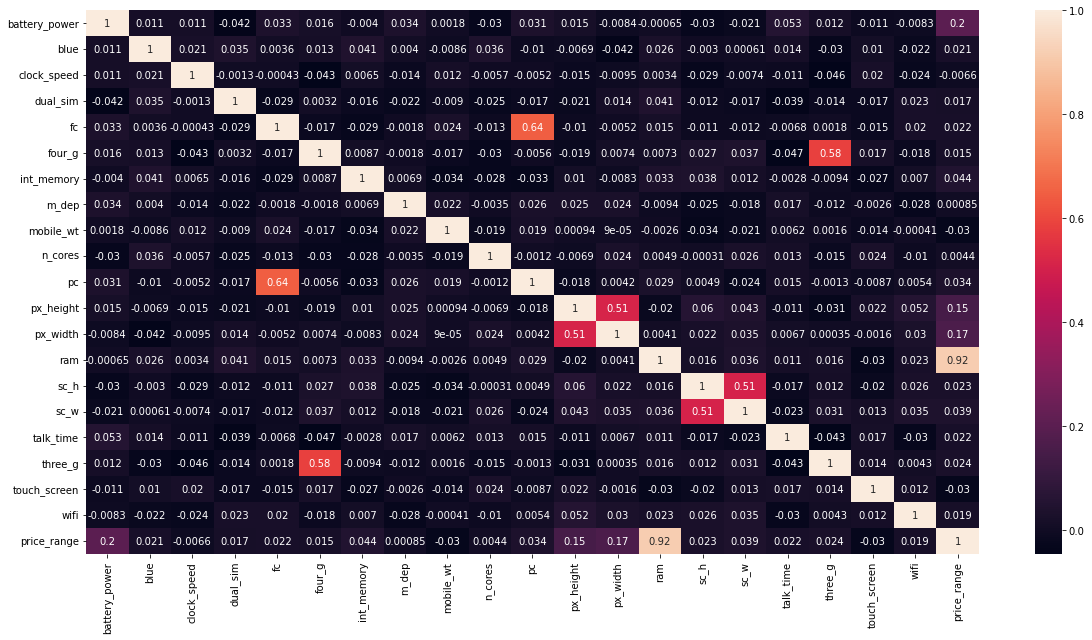

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

#### 4. Wrapper Method

In [73]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [74]:
boston=load_boston()
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE']=pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [75]:
X=df.iloc[:,:13]
y=df.iloc[:,-1]

In [78]:
sfs=SFS(LinearRegression(),
       k_features=8,
       floating=False,
       scoring='r2',
       cv=0)

#use sfs to select top 5 features
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(8, 8),
                          scoring='r2')

In [79]:
df_sfs_results=pd.DataFrame(sfs.subsets_).transpose()
df_sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)",[0.5441462975864799],0.544146,"(LSTAT,)"
2,"(5, 12)",[0.6385616062603403],0.638562,"(RM, LSTAT)"
3,"(5, 10, 12)",[0.6786241601613112],0.678624,"(RM, PTRATIO, LSTAT)"
4,"(5, 7, 10, 12)",[0.6903077016842538],0.690308,"(RM, DIS, PTRATIO, LSTAT)"
5,"(4, 5, 7, 10, 12)",[0.7080892893529662],0.708089,"(NOX, RM, DIS, PTRATIO, LSTAT)"
6,"(3, 4, 5, 7, 10, 12)",[0.7157742117396082],0.715774,"(CHAS, NOX, RM, DIS, PTRATIO, LSTAT)"
7,"(3, 4, 5, 7, 10, 11, 12)",[0.7221614025277103],0.722161,"(CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)"
8,"(1, 3, 4, 5, 7, 10, 11, 12)",[0.7266078587396031],0.726608,"(ZN, CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)"


#### 5. Backward Elimination

In [80]:
from sklearn.feature_selection import RFE

In [81]:
X=boston.data
y=boston.target

In [82]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=5,step=1)
fit=selector.fit(X,y)

In [83]:
df_RFE_results=[]
for i in range(X.shape[1]):
    df_RFE_results.append(
    {
        'Feature_names':boston.feature_names[i],
        'Selected':selector.support_[i],
        'RFE_ranking':selector.ranking_[i]
    }
    )
    
df_RFE_results=pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,CRIM,False,4
1,ZN,False,6
2,INDUS,False,5
3,CHAS,True,1
4,NOX,True,1
5,RM,True,1
6,AGE,False,9
7,DIS,True,1
8,RAD,False,3
